# Stanford CME 241 (Winter 2024) - Assignment 2

**Due: Jan 22 @ 11:59pm Pacific Time on Gradescope.**

Assignment instructions:
- **Please solve questions 1 and 2, and choose one of questions 3 or 4.**
- Questions 1 and 2 of this homework focus on Markov Processes (MP and MRP) that were taught in class in the second week and are covered in Chapter 3 of the book. 
- Questions 3 and 4 cover Markov Decision Processes that will be taught in the third week and are covered in Chapter 4 of the book.
- Empty code blocks are for your use. Feel free to create more under each section as needed.

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/my-username/my-repo/assignment-file-name.ipynb

## Imports

In [129]:
!python3 -m venv .venv

In [130]:
!source .venv/bin/activate

In [131]:
import numpy as np
import sys
sys.path.append('./RL-book/')

In [132]:
!pip install -r RL-book/requirements.txt

You should consider upgrading via the 'pip install --upgrade pip' command.


## Question 1
In the classic childhood game of Snakes and Ladders, all players start to the left of square 1 (call this position 0) and roll a 6-sided die to represent the number of squares they can move forward. The goal is to reach square 100 as quickly as possible. Landing on the bottom rung of a ladder allows for an automatic free-pass to climb, e.g. square 4 sends you directly to 14; whereas landing on a snake's head forces one to slide all the way to the tail, e.g. square 34 sends you to 6. Note, this game can be viewed as a Markov Process, where the outcome is only depedent on the current state and not the prior trajectory. In this question, we will ask you to both formally describe the Markov Process that describes this game, followed by coding up a version of the game to get familiar with the RL-book libraries.

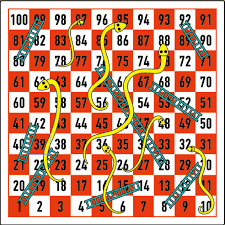

### Part a
Formalize the state space of the Snakes and Ladders game.

There are 101 states, each representing a tile on the board (including the 0 start space). Let the state space $S$ be the set of integers $\{0,1,2...,99,100\}$, each corresponding to the associated tile number.

### Part b
Write out the structure of the transition probabilities. Feel free to abbreviate all squares that do not have a snake or ladder.

Let $K$ be the set of all squares that do not have a snake or a ladder. Then the transition probabilities for a given state $s$ are:

If $s = 100$: $s$ is a terminal state so $P(i,j) = 0$ for all $i \neq j$ and $P(i,i)=1$.

If $s \in K$: $P(i,j) = \frac{1}{6}$ if $1 \leq j - i \leq 6$, and $P(i,j) = 0$ otherwise.

If $s \notin K$: $P(i,j) = 1$ if $j$ is wherever the snake or ladder leads to, and $P(i,j) = 0$ otherwise.

### Part c
Code up a `transition_map: Transition[S]` data structure to represent the transition probabilities of the Snakes and Ladders Markov Process so you can model the game as an instance of `FiniteMarkovProcess`. Use the `traces` method to create sampling traces.

In [133]:
from rl.distribution import Categorical
from rl.markov_process import FiniteMarkovProcess, State, NonTerminal, Terminal
from rl.distribution import Constant
from typing import Dict

snakes = {97: 78, 95: 56, 88: 24, 62: 18, 36: 6, 48: 26, 32: 10}
ladders = {1: 38, 4: 14, 8: 30, 21: 42, 28: 76, 50: 67, 71: 92, 80: 99}

# Combining snakes and ladders into a single mapping for simplicity
transitions = {**snakes, **ladders}
# Defining the state space (0 to 100, where 100 is the goal)
states = range(101)

def create_transition_map() -> Dict[int, Categorical[int]]:
    transition_map = {}

    for state in states:
        if state == 100:
            transition_map[NonTerminal(state)] = Categorical({Terminal(100): 1})
        elif state in transitions:  # If the state is a snake or ladder
            # The only possible transition is to the end of the snake or ladder
            transition_map[state] = Categorical({transitions[state]: 1})
        else:  # For the last 6 states, we need to handle the edge cases
            next_states = {}
            for roll in range(1, 7):
                next_state = state + roll
                if next_state > 100:
                    # If the roll takes us past 100, stay in the current state
                    next_states[state] = next_states.get(state, 0) + 1/6
                elif next_state in transitions:
                    # If the next state is a snake or ladder
                    next_states[transitions[next_state]] = next_states.get(transitions[next_state], 0) + 1/6
                else:
                    # Regular move
                    next_states[next_state] = next_states.get(next_state, 0) + 1/6
            transition_map[state] = Categorical(next_states)

    return transition_map


# Create the FiniteMarkovProcess instance
snakes_and_ladders_mdp = FiniteMarkovProcess(create_transition_map())

start_distribution = Constant(NonTerminal(0))

# Number of traces to generate
num_traces = 5

# Generate and print the traces
for i, trace in enumerate(snakes_and_ladders_mdp.traces(start_distribution)):
    print(f"Trace {i+1}:")
    for state in trace:
        print(state)
        if isinstance(state, Terminal):
            break
    if i >= num_traces - 1:
        break


Initialization started
Trace 1:
NonTerminal(state=0)
NonTerminal(state=2)
NonTerminal(state=30)
NonTerminal(state=6)
NonTerminal(state=30)
NonTerminal(state=6)
NonTerminal(state=10)
NonTerminal(state=14)
NonTerminal(state=15)
NonTerminal(state=18)
NonTerminal(state=19)
NonTerminal(state=42)
NonTerminal(state=43)
NonTerminal(state=45)
NonTerminal(state=49)
NonTerminal(state=53)
NonTerminal(state=55)
NonTerminal(state=59)
NonTerminal(state=65)
NonTerminal(state=67)
NonTerminal(state=73)
NonTerminal(state=79)
NonTerminal(state=81)
NonTerminal(state=84)
NonTerminal(state=87)
NonTerminal(state=92)
NonTerminal(state=96)
NonTerminal(state=78)
NonTerminal(state=83)
NonTerminal(state=87)
NonTerminal(state=91)
NonTerminal(state=92)
NonTerminal(state=93)
NonTerminal(state=94)
Terminal(state=100)
Trace 2:
NonTerminal(state=0)
NonTerminal(state=38)
NonTerminal(state=43)
NonTerminal(state=26)
NonTerminal(state=31)
NonTerminal(state=10)
NonTerminal(state=16)
NonTerminal(state=22)
NonTerminal(state=27

### Part d

Plot the sample traces and a graph of the distribution of time steps to finish the game.

In [134]:
import matplotlib.pyplot as plt

num_traces = 1000  # Number of traces (games) to simulate
game_lengths = []  # To store the length of each game

for trace in snakes_and_ladders_mdp.traces(start_distribution):
    trace_length = sum(1 for _ in trace) - 1  # Subtract 1 to exclude the terminal state
    game_lengths.append(trace_length)
    if len(game_lengths) >= num_traces:
        break

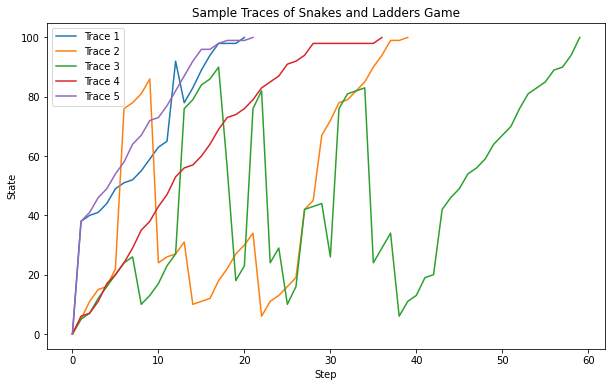

In [135]:
# Plotting first few sample traces
plt.figure(figsize=(10, 6))
for i, trace in enumerate(snakes_and_ladders_mdp.traces(start_distribution)):
    states = [state.state for state in trace]
    plt.plot(states, label=f"Trace {i+1}")
    if i >= 4:  # Plot only the first 5 traces
        break

plt.xlabel('Step')
plt.ylabel('State')
plt.title('Sample Traces of Snakes and Ladders Game')
plt.legend()
plt.show()

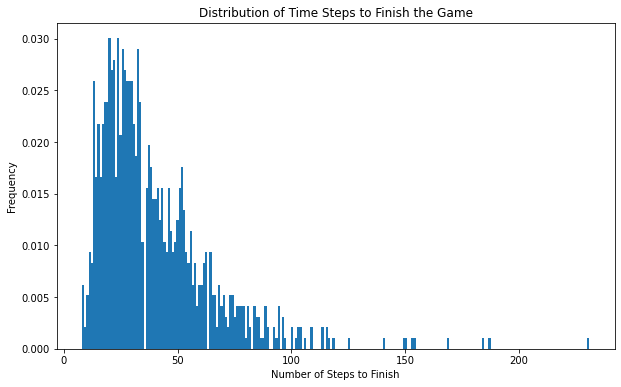

In [136]:
plt.figure(figsize=(10, 6))
plt.hist(game_lengths, bins=max(game_lengths), density=True)
plt.xlabel('Number of Steps to Finish')
plt.ylabel('Frequency')
plt.title('Distribution of Time Steps to Finish the Game')
plt.show()

### Part e
For the Snakes and Ladders game, calculate the expected number of rolls to finish the game. Hint: in order to calculate this, extend the Snakes and Ladders `FiniteMarkovProcess` to an appropriate `FiniteMarkovRewardProcess` instance. What should be the Rewards model in this MRP so you can use one of the methods in the `FiniteMarkovRewardProcess` class to determine the expected number of dice rolls to finish the game?

In [137]:
from rl.distribution import Categorical
from rl.markov_process import FiniteMarkovRewardProcess, State, NonTerminal, Terminal
from typing import Dict, Tuple
import numpy as np

# Define snakes and ladders
snakes = {97: 78, 95: 56, 88: 24, 62: 18, 36: 6, 48: 26, 32: 10}
ladders = {1: 38, 4: 14, 8: 30, 21: 42, 28: 76, 50: 67, 71: 92, 80: 99}

# Combining snakes and ladders into a single mapping for simplicity
transitions = {**snakes, **ladders}

# Defining the state space (0 to 100, where 100 is the goal)
states = range(101)

# Function to create the reward transition map
def create_reward_transition_map() -> Dict[State, Categorical[Tuple[State, float]]]:
    reward_transition_map = {}
    for state in states:
        if state == 100:
            reward_transition_map[NonTerminal(state)] = Categorical({(Terminal(100), 0): 1})
        else:
            next_states_rewards = {}
            for roll in range(1, 7):
                next_state = state + roll
                if next_state > 100:  # Stay at the current state if roll exceeds 100
                    next_state = state
                if next_state in transitions:
                    next_states_rewards[(NonTerminal(transitions[next_state]), -1)] = next_states_rewards.get((NonTerminal(transitions[next_state]), -1), 0) + 1/6
                else:
                    next_states_rewards[(NonTerminal(next_state), -1)] = next_states_rewards.get((NonTerminal(next_state), -1), 0) + 1/6
            reward_transition_map[NonTerminal(state)] = Categorical(next_states_rewards)
    return reward_transition_map

# Create the FiniteMarkovRewardProcess instance
reward_transition_map = create_reward_transition_map()
snakes_and_ladders_mrp = FiniteMarkovRewardProcess(reward_transition_map)

# Calculate the expected number of rolls
gamma = 0.9999  # Near 1 discounting
expected_rolls = -snakes_and_ladders_mrp.get_value_function_vec(gamma=gamma)[0]
print(f"Expected number of rolls to finish the game: {expected_rolls}")


Expected number of rolls to finish the game: 38.90887391571079


## Question 2
Consider the problem of a frog jumping across a river with $n=9$ lilypads. The frog at every time step will randomly jump to a position in front of it (e.g. at the starting step, the frog will jump with $\frac{1}{10}$ probability to each of the lilypads or $\frac{1}{10}$ to the other side of the river). A diagram of the frog jumping problem is below.

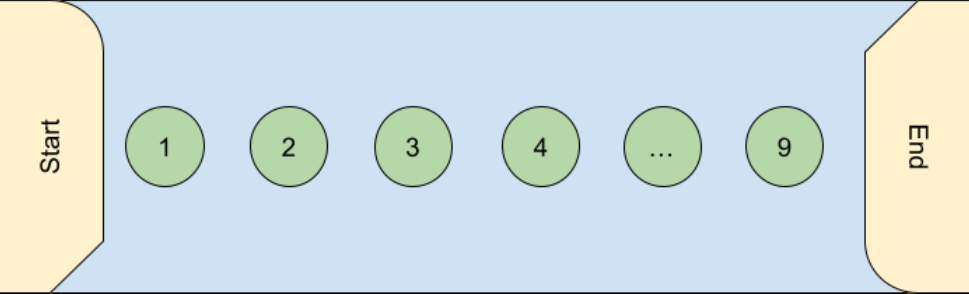

### Part a
Formalize the states of the jumping frog problem as well as the structure of the transition probabilites.

There are 11 states, each representing a lilipad, the start, or the end states. Let the state space $S$ be the set of the start, end, and each lilipad so  $S = \{0,1,2...,9,10\}$. Each corresponding number is associated with that numbered lillipad, the 0 is the start, and the 10 is the end.

Let $K$ be the set of all squares that do not have a snake or a ladder. Then the transition probabilities for a given state $s$ are:

If $s = 10$: $s$ is a terminal state so $P(i,j) = 0$ for all $i \neq j$ and $P(i,i) = 1$

If $s < 10$: $P(i,j) = \frac{1}{10-i}$ for $j>i$ and $P(i,j) = 0$ otherwise

### Part b
Compute the expected number of steps that it would take for the frog to reach the other side.

Let $E[i]$ be the number of expected steps the frog must jump from position $i$.

We know $E[10] = 0$ because we are already there.

We know $E[9] = 1$ because we must jump to the end.

We knoe $E[8] = 1 + 1/2 * E[9] + 1/2 * E[10]$ = 3/2

$E[7] = 1 + 1/3 * E[8] + 1/3 * E[9] + 1/3 * E[10] = 11/6$

$E[6] = 1 + 1/4 * E[7] + 1/4 * E[8] + 1/4 * E[9] + 1/4 * E[10] = 25/12$

$E[5] = 1 + 1/5 * E[6] + 1/5 * E[7] + 1/5 * E[8] + 1/5 * E[9] + 1/5 * E[10] = 137/60$

... (it's adding the next harmonic number each time)

$E[0] = 1 + 1/2 + 1/3 + ... + 1/9 + 1/10 = 7381/2520$


### Part c
Provide a closed form solution for the expected number of steps / jumps to cross the river for arbitrary $n$. A formal proof is not required. 

$E[n] = \sum^{n+1}_1 1/i$

## Question 3
Consider an MDP with an infinite set of states $\mathcal{S} = \{1,2,3,\ldots \}$. The start state is $s=1$. Each state $s$ allows a continuous set of actions $a \in [0,1]$. The transition probabilities are given by: $$\mathbb{P}[s+1 \mid s, a] = a, \mathbb{P}[s \mid s, a] = 1 - a \text{ for all } s \in \mathcal{S} \text{ for all } a \in [0,1]$$
For all states $s \in \mathcal{S}$ and actions $a \in [0,1]$, transitioning from $s$ to $s+1$ results in a reward of $1-a$ and transitioning from $s$ to $s$ results in a reward of $1+a$. The discount factor $\gamma=0.5$.

### Part a
Using the MDP Bellman Optimality Equation, calculate the Optimal Value Function $V^*(s)$ for all $s \in \mathcal{S}$

In [138]:
import numpy as np

# MDP parameters
gamma = 0.5
num_states = 100  # Assuming a large enough finite number of states for practical purposes
actions = np.linspace(0, 1, 1000)  # Continuous set of actions

# Transition probabilities
def transition_prob(s, a):
    return a, 1 - a

# Bellman Optimality Equation
def bellman_optimality_equation(V, s):
    max_q_value = float('-inf')
    for a in actions:
        transition_prob_s = transition_prob(s, a)[0]
        q_value = (-2*(a**2) + a + 1) + gamma * (a * V[s] + (1 - a) * V[s + 1])#immediate expected reward is (1-a)*a + (1+a)*(1-a), then discounted future reward
        max_q_value = max(max_q_value, q_value)
    return max_q_value

# Solve the Bellman Optimality Equation
def calculate_optimal_value_function():
    num_iterations = 1000  # Number of iterations for convergence
    V = np.zeros(num_states + 1)

    for _ in range(num_iterations):
        new_V = np.zeros(num_states + 1)
        for s in range(num_states-1, -1, -1):
            new_V[s] = bellman_optimality_equation(V, s)

        # Check for convergence
        if np.max(np.abs(new_V - V)) < 1e-6:
            break

        V = new_V

    return V

# Calculate the optimal value function
optimal_values = calculate_optimal_value_function()

# Print the optimal values
for s, value in enumerate(optimal_values[1:], start=1):
  print(f"Optimal Value for State {s}: {value}")

Optimal Value for State 1: 2.2499986766157627
Optimal Value for State 2: 2.2499986766157627
Optimal Value for State 3: 2.2499986766157627
Optimal Value for State 4: 2.2499986766157627
Optimal Value for State 5: 2.2499986766157627
Optimal Value for State 6: 2.2499986766157627
Optimal Value for State 7: 2.2499986766157627
Optimal Value for State 8: 2.2499986766157627
Optimal Value for State 9: 2.2499986766157627
Optimal Value for State 10: 2.2499986766157627
Optimal Value for State 11: 2.2499986766157627
Optimal Value for State 12: 2.2499986766157627
Optimal Value for State 13: 2.2499986766157627
Optimal Value for State 14: 2.2499986766157627
Optimal Value for State 15: 2.2499986766157627
Optimal Value for State 16: 2.2499986766157627
Optimal Value for State 17: 2.2499986766157627
Optimal Value for State 18: 2.2499986766157627
Optimal Value for State 19: 2.2499986766157627
Optimal Value for State 20: 2.2499986766157627
Optimal Value for State 21: 2.2499986766157627
Optimal Value for Stat

### Part b
Calculate an Optimal Deterministic Policy $\pi^*(s)$ for all $s \in \mathcal{S}$

In [139]:
import numpy as np

# MDP parameters
gamma = 0.5
num_states = 100  # Assuming a large enough finite number of states for practical purposes
actions = np.linspace(0, 1, 1000)  # Continuous set of actions

# Transition probabilities
def transition_prob(s, a):
    return a, 1 - a

# Bellman Optimality Equation
def bellman_optimality_equation(V, s):
    max_q_value = float('-inf')
    optimal_action = None
    for a in actions:
        transition_prob_s = transition_prob(s, a)[0]
        q_value = (-2*(a**2) + a + 1) + gamma * (a * V[s] + (1 - a) * V[s + 1])
        if q_value > max_q_value:
            max_q_value = q_value
            optimal_action = a
    return optimal_action

# Solve the Bellman Optimality Equation to get optimal policy
def calculate_optimal_policy():
    num_iterations = 1000  # Number of iterations for convergence
    V = np.zeros(num_states + 1)
    optimal_policy = np.zeros(num_states)

    for _ in range(num_iterations):
        new_V = np.zeros(num_states + 1)
        for s in range(num_states-1, -1, -1):
            new_V[s] = bellman_optimality_equation(V, s)

        # Check for convergence
        if np.max(np.abs(new_V - V)) < 1e-6:
            break

        V = new_V

    # Extract optimal policy
    for s in range(num_states):
        optimal_policy[s] = bellman_optimality_equation(V, s)

    return optimal_policy

# Calculate the optimal policy
optimal_policy = calculate_optimal_policy()

# Print the optimal policy
for s, action in enumerate(optimal_policy):
    print(f"Optimal Action for State {s + 1}: {action}")

Optimal Action for State 1: 0.2502502502502503
Optimal Action for State 2: 0.2502502502502503
Optimal Action for State 3: 0.2502502502502503
Optimal Action for State 4: 0.2502502502502503
Optimal Action for State 5: 0.2502502502502503
Optimal Action for State 6: 0.2502502502502503
Optimal Action for State 7: 0.2502502502502503
Optimal Action for State 8: 0.2502502502502503
Optimal Action for State 9: 0.2502502502502503
Optimal Action for State 10: 0.2502502502502503
Optimal Action for State 11: 0.2502502502502503
Optimal Action for State 12: 0.2502502502502503
Optimal Action for State 13: 0.2502502502502503
Optimal Action for State 14: 0.2502502502502503
Optimal Action for State 15: 0.2502502502502503
Optimal Action for State 16: 0.2502502502502503
Optimal Action for State 17: 0.2502502502502503
Optimal Action for State 18: 0.2502502502502503
Optimal Action for State 19: 0.2502502502502503
Optimal Action for State 20: 0.2502502502502503
Optimal Action for State 21: 0.2502502502502503
O

## Question 4
Consider again the problem of a frog jumping across a river with $n-1$ lilypads, labeled $1, \dots, n-1$, with the two riverbanks labeled positions $0$ and $n$. At each time step, the frog who is at lilypad $i$ has two options:
- (Strategy A) The frog moves to lilypad $i-1$  with probability $\frac{i}{n}$ and moves to lilypad $i+1$ otherwise.
- (Strategy B) The frog moves to arbitrary position from $0,\dots,n$ with equal probability.

The frog now starts on a random lilypad. A snake lives on one end of the river (say the snake lives at 0) and will eat the frog if it lands on this side of the river. The frog can escape by landing the other side of the river (i.e. position $n$). What should the frog's strategy be when on each of the lilypads $1, 2, \ldots, n-1$, in order to maximize the probability of escaping the pond (reaching $n$ before reaching $0$)? Although there are more than one ways of solving this problem, we would like to solve it by modeling it as an MDP and identifying the Optimal Policy.

Note: Sorry for all the frog jumping questions. These games are an easy way to understand Markov Processes, without having to build out too much detail of a financial simulation. Questions will be more related to finance over time.

### Part a
Express with clear mathematical notation the state space, the action space, transition function, and rewards function of an MDP so that the frog-escape problem would be solved by arriving at the Optimal Value Function (and hence, the Optimal Policy) of the MDP.

### Part b
Write code to model this MDP as an instance of the `FiniteMarkovDecisionProcess` class. We have learnt that there exists an optimal deterministic policy, and there are $2^{n-1}$ possible deterministic policies for this problem. Write code to create each of these $2^{n-1}$ deterministic policies (as instances of `FinitePolicy` class), create a policy-implied Finite MRP for each of these deterministic policies (using the `apply_finite_policy` method of `FiniteMarkovDecisionProcess` class), and evaluate the Value Function for each of those implied Finite MRPs (using the `get_value_function_vec` method of `FiniteMarkovRewardProcess` class). This should gives you the Optimal Value Function and the Optimal Deterministic Policy.

### Part c
Plot a graph of the Optimal Escape-Probability and of the associated strategies, as a function of the states of this MDP, for $n=3, n=6$ and $n=9$. By looking at the results on this graph, what pattern do you observe for the optimal policy as you vary $n$ from 3 to 9? 

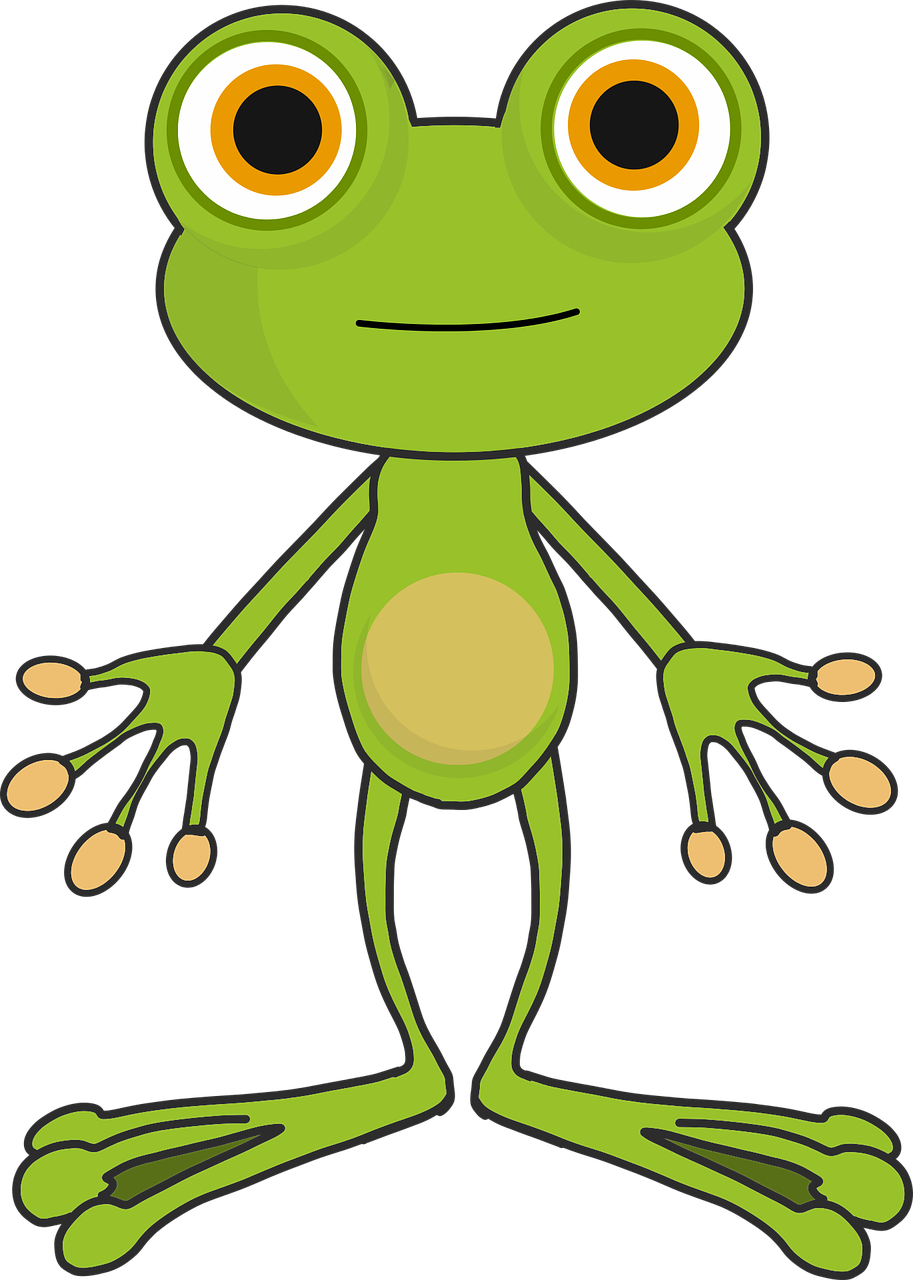